# Low-Rank Approximation: Image Compression

This is a demo of image compression using low-rank approximation by truncated SVD.

## Code and Result

In [1]:
# Packages.
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

(-0.5, 169.5, 169.5, -0.5)

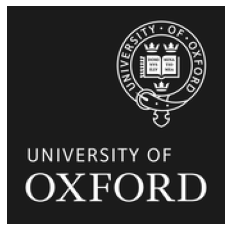

In [2]:
# Load an image, and convert it to black and white.
img = Image.open("Oxford.png")
imggray = img.convert("LA")
plt.imshow(imggray)
plt.axis("off")

In [3]:
# Convert the image data into a numpy matrix.
imgmat = np.array(list(imggray.getdata(band=0)), float) # Band=0 means returning the pixel content 
                                                        # of the first channel.
imgmat.shape = (imggray.size[1], imggray.size[0])
imgmat = np.matrix(imgmat)

In [4]:
# Compute the SVD.
U, sigma, V = np.linalg.svd(imgmat)

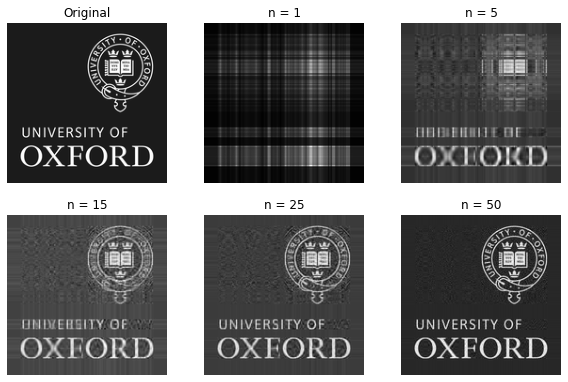

In [5]:
# Truncated SVD.
trun_imgs = [imggray]
titles = ["Original"]

for i in [1, 5, 15, 25, 50]:
    trun_img = np.matrix(U[:, :i]) * np.diag(sigma[:i]) * np.matrix(V[:i, :])
    title = "n = %s" % i
    titles += [title]
    trun_imgs += [trun_img]

plt.figure(figsize=(10, 10))
for i in range(0, 6):
    plt.subplot(3, 3, i+1)
    plt.imshow(trun_imgs[i], cmap="gray")
    plt.title(titles[i])
    plt.axis("off")
plt.show()

## Conclusion

We see that as the rank is increased, the image becomes finer and finer. At rank 50, it is fair to say the image looks almost identical to the original.